MNIST using tensorflow

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
mnist= tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

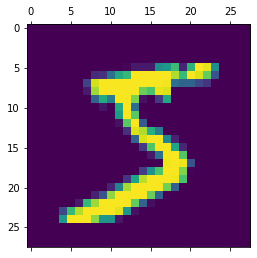

In [10]:
plt.matshow(x_train[0])

In [11]:
x_train_flat =tf.keras.utils.normalize(x_train, axis=1)
x_test_flat= tf.keras.utils.normalize(x_test,axis=1)

In [12]:
x_train_flat[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

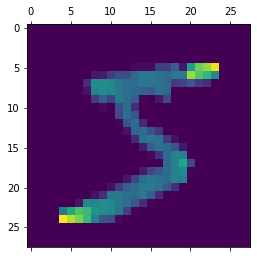

In [13]:
plt.matshow(x_train_flat[0])

In [14]:
#model= tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())


#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.fit(x_train, y_train, epochs=3)

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3236 - accuracy: 0.9112
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1499 - accuracy: 0.9557
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1062 - accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0804 - accuracy: 0.9763
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9809


In [16]:
val_loss, val_acc=model.evaluate(x_test_flat,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0966 - accuracy: 0.9705
0.09663889557123184 0.9704999923706055


In [17]:
y_predicted=model.predict(x_test_flat)
y_predicted[0]

313/313 [==============================] - 0s 982us/step


array([3.7539976e-08, 9.6668680e-11, 1.0354302e-05, 6.0968159e-04,
       1.0254316e-10, 4.0269750e-08, 8.7574770e-14, 9.9937350e-01,
       4.7467353e-07, 5.9658041e-06], dtype=float32)

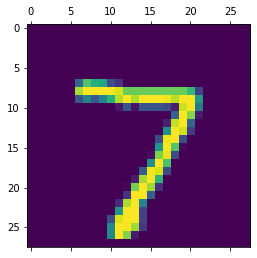

In [18]:
plt.matshow(x_test[0])

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]